<a href="https://colab.research.google.com/github/Bhoomij123/Python/blob/main/SVM_NaiveBayes_Practical_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM & Naïve Bayes – Practical Assignment (Python)

This notebook contains Python programs for all the required practical questions based on **Support Vector Machines (SVM)** and **Naïve Bayes**.

> Note:  
> - Make sure you have `scikit-learn`, `matplotlib`, `seaborn`, and `pandas` installed.  
> - Some examples (like 20 Newsgroups) may require internet on first run to download the dataset.


## 1. Train an SVM Classifier on the Iris dataset and evaluate accuracy

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on Iris dataset (Linear SVM): {acc:.4f}")

Accuracy on Iris dataset (Linear SVM): 1.0000


## 2. Train SVM with Linear and RBF kernels on Wine dataset and compare accuracies

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear kernel accuracy: {acc_linear:.4f}")
print(f"RBF kernel accuracy   : {acc_rbf:.4f}")

Linear kernel accuracy: 0.9444
RBF kernel accuracy   : 0.6944


## 3. Train an SVR on a housing dataset and evaluate using Mean Squared Error (MSE)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"SVR MSE on housing dataset: {mse:.4f}")

SVR MSE on housing dataset: 0.3570


## 4. Train an SVM Classifier with Polynomial Kernel and visualize the decision boundary

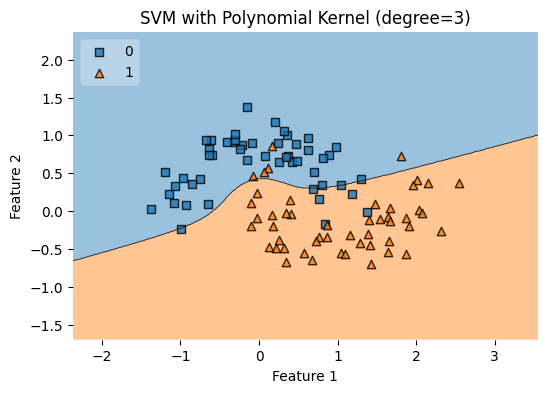

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X, y = make_moons(noise=0.2, random_state=42)

clf_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')
clf_poly.fit(X, y)

plt.figure(figsize=(6, 4))
plot_decision_regions(X, y, clf=clf_poly, legend=2)
plt.title('SVM with Polynomial Kernel (degree=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 5. Train a Gaussian Naïve Bayes classifier on Breast Cancer dataset and evaluate accuracy

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Gaussian NB accuracy on Breast Cancer dataset: {acc:.4f}")

Gaussian NB accuracy on Breast Cancer dataset: 0.9386


## 6. Train a Multinomial Naïve Bayes classifier for text classification (20 Newsgroups)

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X_text, y = newsgroups.data, newsgroups.target

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english', max_features=20000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Multinomial NB accuracy on 20 Newsgroups: {acc:.4f}")

Multinomial NB accuracy on 20 Newsgroups: 0.7358


## 7. Train SVM with different C values and compare decision boundaries visually

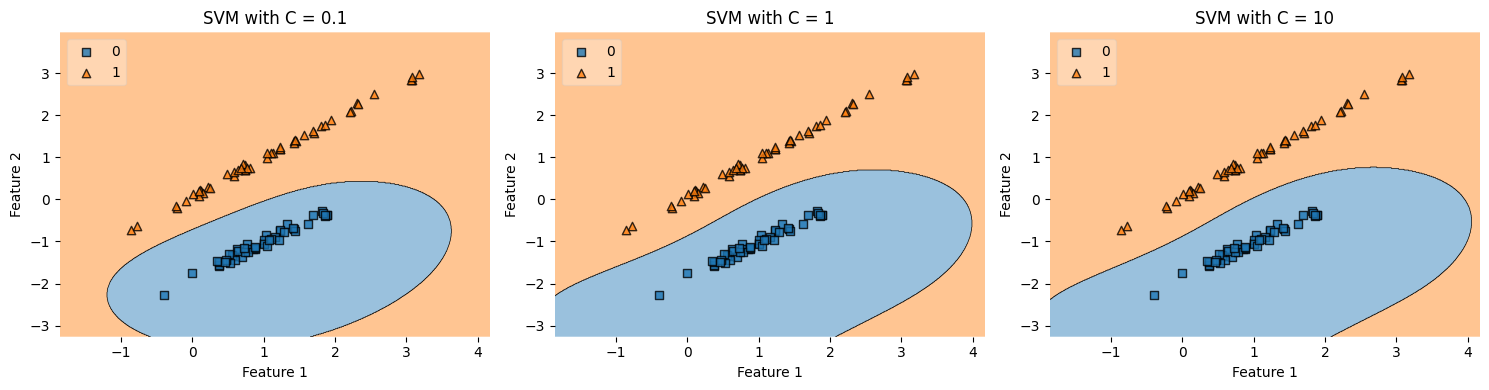

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)

C_values = [0.1, 1, 10]

plt.figure(figsize=(15, 4))
for i, C in enumerate(C_values, 1):
    clf = SVC(kernel='rbf', C=C, gamma='scale').fit(X, y)
    plt.subplot(1, 3, i)
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(f"SVM with C = {C}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

## 8. Train a Bernoulli Naïve Bayes classifier on a binary feature dataset

In [8]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=0, random_state=42)
X_binary = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42, stratify=y)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Bernoulli NB accuracy on binary dataset: {acc:.4f}")

Bernoulli NB accuracy on binary dataset: 0.6850


## 9. Apply feature scaling before training an SVM and compare with unscaled data

In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {acc_unscaled:.4f}")
print(f"Accuracy with scaling   : {acc_scaled:.4f}")

Accuracy without scaling: 0.6944
Accuracy with scaling   : 0.9722


## 10. Train a Naïve Bayes model and compare predictions before and after Laplace Smoothing

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categories = ['rec.sport.baseball', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X_text, y = newsgroups.data, newsgroups.target

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = CountVectorizer(stop_words='english', min_df=2)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

nb_no_smoothing = MultinomialNB(alpha=0.0)
nb_no_smoothing.fit(X_train, y_train)
y_pred_no = nb_no_smoothing.predict(X_test)
acc_no = accuracy_score(y_test, y_pred_no)

nb_laplace = MultinomialNB(alpha=1.0)
nb_laplace.fit(X_train, y_train)
y_pred_laplace = nb_laplace.predict(X_test)
acc_laplace = accuracy_score(y_test, y_pred_laplace)

print(f"Accuracy without Laplace smoothing (alpha=0): {acc_no:.4f}")
print(f"Accuracy with Laplace smoothing (alpha=1):   {acc_laplace:.4f}")

Accuracy without Laplace smoothing (alpha=0): 0.8338
Accuracy with Laplace smoothing (alpha=1):   0.9622


/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


## 11. Train an SVM Classifier and tune hyperparameters (C, gamma, kernel) using GridSearchCV

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.01, 0.1]
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print(f"Best CV score: {grid.best_score_:.4f}")
print(f"Test accuracy: {grid.score(X_test, y_test):.4f}")

Best parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best CV score: 0.9802
Test accuracy: 0.9825


## 12. Train an SVM on an imbalanced dataset and apply class weighting

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from collections import Counter

X, y = make_classification(n_samples=2000, n_features=20, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

print("Class distribution:", Counter(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_no_weight = SVC(kernel='rbf', random_state=42)
svm_no_weight.fit(X_train, y_train)
print("Without class_weight:")
print(classification_report(y_test, svm_no_weight.predict(X_test)))

svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
print("With class_weight='balanced':")
print(classification_report(y_test, svm_weighted.predict(X_test)))

Class distribution: Counter({np.int64(0): 1800, np.int64(1): 200})
Without class_weight:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       360
           1       0.89      0.20      0.33        40

    accuracy                           0.92       400
   macro avg       0.90      0.60      0.64       400
weighted avg       0.92      0.92      0.89       400

With class_weight='balanced':
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       360
           1       0.56      0.95      0.70        40

    accuracy                           0.92       400
   macro avg       0.78      0.93      0.83       400
weighted avg       0.95      0.92      0.93       400



## 13. Implement a Naïve Bayes classifier for spam detection using email-like text data

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

categories = ['comp.os.ms-windows.misc', 'talk.politics.misc']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X_text, y = data.data, data.target

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       197
           1       0.99      0.97      0.98       155

    accuracy                           0.98       352
   macro avg       0.98      0.98      0.98       352
weighted avg       0.98      0.98      0.98       352



## 14. Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare accuracy

In [14]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM accuracy: {acc_svm:.4f}")
print(f"Naïve Bayes accuracy: {acc_nb:.4f}")

SVM accuracy: 0.9722
Naïve Bayes accuracy: 0.9722


## 15. Perform feature selection before Naïve Bayes and compare results

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_full = accuracy_score(y_test, y_pred)

selector = SelectKBest(chi2, k=10)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

nb_sel = GaussianNB()
nb_sel.fit(X_train_sel, y_train)
y_pred_sel = nb_sel.predict(X_test_sel)
acc_sel = accuracy_score(y_test, y_pred_sel)

print(f"Accuracy without feature selection: {acc_full:.4f}")
print(f"Accuracy with feature selection   : {acc_sel:.4f}")

Accuracy without feature selection: 0.9386
Accuracy with feature selection   : 0.9211


## 16. Train SVM using One-vs-Rest (OvR) and One-vs-One (OvO) on Wine dataset and compare accuracy

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ovr_clf = OneVsRestClassifier(SVC(kernel='rbf', random_state=42))
ovo_clf = OneVsOneClassifier(SVC(kernel='rbf', random_state=42))

ovr_clf.fit(X_train_scaled, y_train)
ovo_clf.fit(X_train_scaled, y_train)

y_pred_ovr = ovr_clf.predict(X_test_scaled)
y_pred_ovo = ovo_clf.predict(X_test_scaled)

acc_ovr = accuracy_score(y_test, y_pred_ovr)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"OvR accuracy: {acc_ovr:.4f}")
print(f"OvO accuracy: {acc_ovo:.4f}")

OvR accuracy: 0.9722
OvO accuracy: 0.9722


## 17. Train SVM with Linear, Polynomial, and RBF kernels on Breast Cancer dataset and compare accuracy

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    clf = SVC(kernel=k, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"Kernel = {k:6s} -> Accuracy = {acc:.4f}")

Kernel = linear -> Accuracy = 0.9737
Kernel = poly   -> Accuracy = 0.9123
Kernel = rbf    -> Accuracy = 0.9825


## 18. Train an SVM Classifier using Stratified K-Fold Cross-Validation and compute average accuracy

In [18]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

data = load_wine()
X, y = data.data, data.target

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X, y, cv=skf)

print("Cross-validation scores:", scores)
print(f"Average accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.94444444 1.         0.97222222 1.         1.        ]
Average accuracy: 0.9833


## 19. Train a Naïve Bayes classifier using different prior probabilities and compare performance

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
acc_default = accuracy_score(y_test, gnb_default.predict(X_test))

class_prior = [0.7, 0.3]
gnb_prior = GaussianNB(priors=class_prior)
gnb_prior.fit(X_train, y_train)
acc_prior = accuracy_score(y_test, gnb_prior.predict(X_test))

print(f"Accuracy with default priors: {acc_default:.4f}")
print(f"Accuracy with priors {class_prior}: {acc_prior:.4f}")

Accuracy with default priors: 0.9386
Accuracy with priors [0.7, 0.3]: 0.9298


## 20. Perform Recursive Feature Elimination (RFE) before SVM and compare accuracy

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_full = SVC(kernel='linear', random_state=42)
svm_full.fit(X_train_scaled, y_train)
acc_full = accuracy_score(y_test, svm_full.predict(X_test_scaled))

selector = RFE(SVC(kernel='linear', random_state=42), n_features_to_select=10)
selector.fit(X_train_scaled, y_train)
X_train_rfe = selector.transform(X_train_scaled)
X_test_rfe = selector.transform(X_test_scaled)

svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
acc_rfe = accuracy_score(y_test, svm_rfe.predict(X_test_rfe))

print(f"Accuracy with all features: {acc_full:.4f}")
print(f"Accuracy after RFE       : {acc_rfe:.4f}")

Accuracy with all features: 0.9737
Accuracy after RFE       : 0.9474


## 21. Train an SVM Classifier and evaluate Precision, Recall, and F1-Score

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

Precision: 0.9861
Recall   : 0.9861
F1-Score : 0.9861


## 22. Train a Naïve Bayes Classifier and evaluate Log Loss (Cross-Entropy Loss)

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_proba = gnb.predict_proba(X_test)
loss = log_loss(y_test, y_proba)
print(f"Log Loss for Gaussian NB: {loss:.4f}")

Log Loss for Gaussian NB: 0.3713


## 23. Train an SVM Classifier and visualize the Confusion Matrix using seaborn

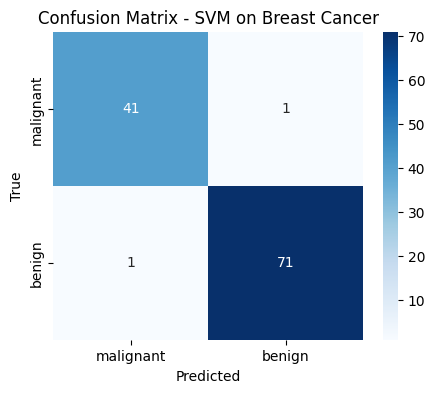

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM on Breast Cancer')
plt.show()

## 24. Train an SVR and evaluate using Mean Absolute Error (MAE)

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"SVR MAE on housing dataset: {mae:.4f}")

SVR MAE on housing dataset: 0.3986


## 25. Train a Naïve Bayes classifier and evaluate ROC-AUC score

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_proba = gnb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC for Gaussian NB: {auc:.4f}")

ROC-AUC for Gaussian NB: 0.9878


## 26. Train an SVM Classifier and visualize the Precision-Recall Curve

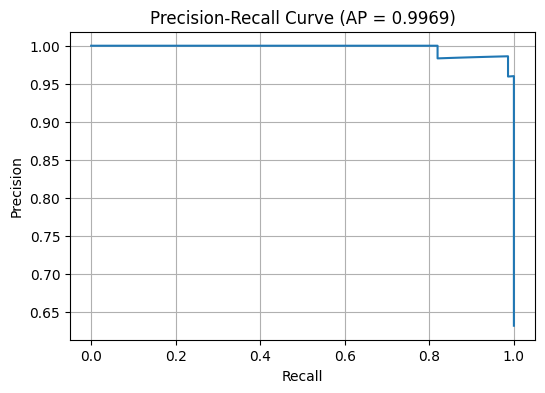

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='rbf', probability=True, random_state=42)
clf.fit(X_train_scaled, y_train)

y_scores = clf.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {avg_precision:.4f})')
plt.grid(True)
plt.show()